# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




<>:55: SyntaxWarning: invalid escape sequence '\$'
<>:55: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Jesper Kristensen\AppData\Local\Temp\ipykernel_22296\2837124958.py:55: SyntaxWarning: invalid escape sequence '\$'
  data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)


,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


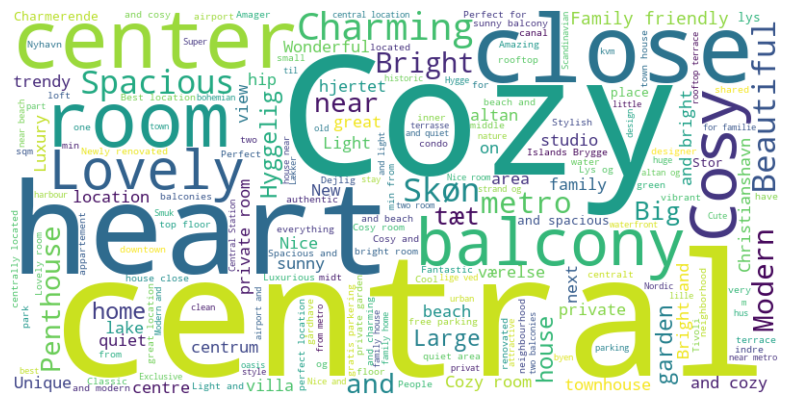

In [1]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365"]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

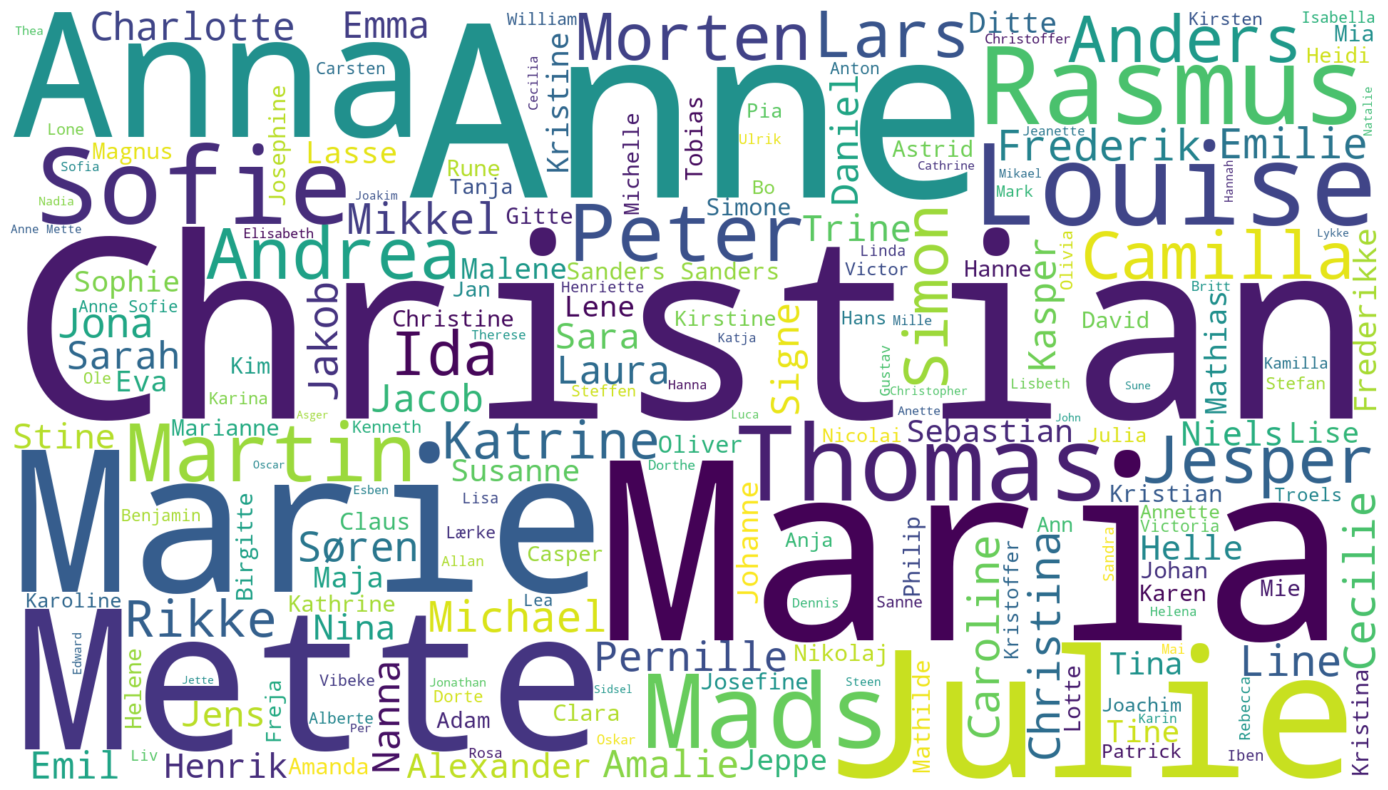

In [2]:
# State your solution here. Add more cells if needed.
import re

# Function to split by multiple delimiters
def split_names(name):
    # Split by ' & ', ' and ', ' og ' using regex pattern
    return re.split(r' & | and | og ', name)

# Split the host names and explode the list to separate names into rows
host_names = data['host_name'].dropna().apply(split_names).explode()

# Extend the list of stop words to exclude non-name words from the word cloud
stop_words.extend(['Copenhagen', 'Apartment', 'Forenom', 'Denmark', 
                   'ApartmentinCopenhagen', 'And', 'Into', 'This', 'Place', 'Og', 'Blueground', 'Rent'])

# Create the word cloud based on the cleaned list of host names
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                      width=1920, height=1080).generate(' '.join(host_names))

# Display the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

In [3]:
# State your solution here. Add more cells if needed. pip inastall plotly : pip install --upgrade nbformat
import plotly.express as px

color_scale = [(0, 'blue'), (0.01, 'green'), (0.02, 'yellow'), (0.03, 'orange'), (0.04, 'purple'), (1,'red')]

fig = px.scatter_mapbox(data_filtered, 
                        lat="latitude", 
                        lon="longitude", 
                        color="price",
                        color_continuous_scale=color_scale,
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map") # other styles can be found here https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html#:~:text=of%20the%20map.-,mapbox_style,-(str%20(default%20%27basic
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}) # removing margin to make it look nice
fig.show()

### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

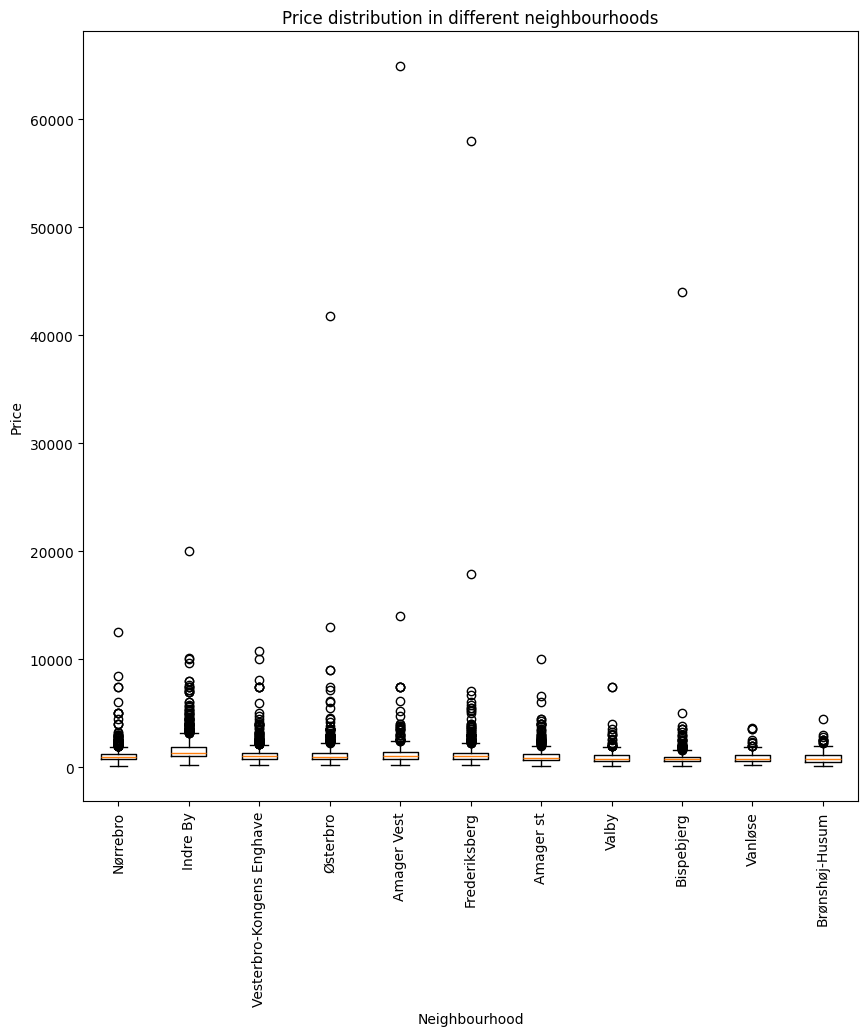

In [4]:
# State your solution here. Add more cells if needed.
import matplotlib.pyplot as plt

# Create a boxplot for the neighbourhoods and the price
plt.figure(figsize=(10, 10))
plt.xticks(rotation=90)
plt.title('Price distribution in different neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.boxplot([data_filtered.loc[data_filtered['neighbourhood_cleansed'] == neighbourhood]['price'] for neighbourhood in neighbourhoods], tick_labels=neighbourhoods)
plt.show()

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [5]:
# State your solution here. Add more cells if needed.
grouped = data_filtered.groupby(['neighbourhood_cleansed', 'room_type'])

descriptive = grouped.agg({'price': ['mean', 'median', 'std', 'min', 'max'], 'minimum_nights': ['mean', 'median', 'std', 'min', 'max']})
display(descriptive)

price                       \
                                                  mean  median          std   
neighbourhood_cleansed    room_type                                           
Amager Vest               Entire home/apt  1234.226623  1050.0   832.696891   
                          Private room     1032.966216   500.0  5299.018095   
                          Shared room      1051.500000  1051.5   112.429978   
Amager st                 Entire home/apt  1093.584071   900.0   721.982284   
                          Hotel room       1296.000000  1201.0   211.184753   
                          Private room      549.325581   471.0   293.995992   
                          Shared room      2575.000000  2575.0          NaN   
Bispebjerg                Entire home/apt   992.592520   800.0  1981.580545   
                          Private room      488.978947   400.0   353.674089   
                          Shared room       198.000000   198.0          NaN   
Brønshøj-Husum            Entire home/apt  1014.995370   900.0   555.669548   
                          Private room      445.552239   400.0   201.631624   
                          Shared room       211.500000   211.5    16.263456   
Frederiksberg             Entire home/apt  1292.472222  1037.0  1958.802772   
                          Private room      621.706767   500.0   567.611220   
Indre By                  Entire home/apt  1642.387192  1400.0  1072.616232   
                          Hotel room       1077.200000  1306.0   654.255098   
                          Private room      698.984375   582.0   380.070466   
                          Shared room       292.000000   280.0    67.577116   
Nørrebro                  Entire home/apt  1047.742192   950.0   583.703218   
                          Private room      650.121212   500.0   760.270040   
                          Shared room       324.666667   400.0   130.481161   
Valby                     Entire home/apt  1017.968889   899.0   635.434691   
                          Private room      498.157303   438.0   288.616366   
Vanløse                   Entire home/apt   954.425197   826.5   496.658320   
                          Private room      413.409091   337.5   194.578652   
Vesterbro-Kongens Enghave Entire home/apt  1181.435119  1000.0   698.122481   
                          Private room      574.366516   500.0   295.726896   
                          Shared room       330.500000   330.5   113.844192   
Østerbro                  Entire home/apt  1248.551107  1000.0  1438.908216   
                          Private room      605.461538   500.0   437.259030   
                          Shared room       469.000000   469.0          NaN   

                                                           minimum_nights  \
                                              min      max           mean   
neighbourhood_cleansed    room_type                                         
Amager Vest               Entire home/apt   250.0  14000.0       4.041804   
                          Private room      200.0  64900.0       2.378378   
                          Shared room       972.0   1131.0       1.000000   
Amager st                 Entire home/apt   240.0  10000.0       4.281922   
                          Hotel room       1149.0   1538.0       1.000000   
                          Private room      135.0   2000.0       4.077519   
                          Shared room      2575.0   2575.0       2.000000   
Bispebjerg                Entire home/apt   235.0  44000.0       4.484252   
                          Private room      143.0   3000.0       5.021053   
                          Shared room       198.0    198.0       1.000000   
Brønshøj-Husum            Entire home/apt   250.0   4462.0       4.435185   
                          Private room      145.0   1200.0       4.552239   
                          Shared room       200.0    223.0       3.500000   
Frederiksberg             Entire home/apt   300.0  

### 5. Based on self-chosen features, develop three different regression models that can predict the price of a rental property. Remember to divide your data into training data and test data. Comment on your findings.

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Combine the data

# This data was chosen since all these featuers affects the price where are we posionet relativ to others('longitude', 'latitude'),
#   how big are the place ('accommodates', 'bedrooms')
#   And the most importent ('room_type') this gives us the most important information.

regression_data = pd.concat([data[['neighbourhood_cleansed', 'room_type', 'accommodates', 'bedrooms', 'longitude', 'latitude']],
                             data_filtered[['price']]], axis=1)


# One-hot encode the 'neighbourhood_cleansed' feature
data_encoded = pd.get_dummies(regression_data.dropna(), drop_first=True)

# Define features and target variable
X = data_encoded.drop(columns=['price'])  # Features
y = data_encoded['price']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)


# Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42, max_depth=4)
tree_model.fit(X_train, y_train)

# Random Forest Regressor
forest_model = RandomForestRegressor(random_state=42, n_estimators=250, max_depth=4)
forest_model.fit(X_train, y_train)

# Evaluate Linear Regression
print(f"Linear Regression train prediction: {linear_model.score(X_train, y_train)}")
print(f"Linear Regression test prediction: {linear_model.score(X_test, y_test)}")

# Evaluate Ridge Regression
print(f"Ridge Regression train prediction: {ridge_model.score(X_train, y_train)}")
print(f"Ridge Regression test prediction: {ridge_model.score(X_test, y_test)}")

# Evaluate Lasso Regression
print(f"Lasso Regression train prediction: {lasso_model.score(X_train, y_train)}")
print(f"Lasso Regression test prediction: {lasso_model.score(X_test, y_test)}")

# Evaluate Decision Tree
print(f"Decision Tree train prediction: {tree_model.score(X_train, y_train)}")
print(f"Decision Tree test prediction: {tree_model.score(X_test, y_test)}")

# Evaluate Random Forest
print(f"Random Forest train prediction: {forest_model.score(X_train, y_train)}")
print(f"Random Forest test prediction: {forest_model.score(X_test, y_test)}")


Linear Regression train prediction: 0.0731808963487981
Linear Regression test prediction: 0.2713730425085872
Ridge Regression train prediction: 0.07311947122019957
Ridge Regression test prediction: 0.27111955048670144
Lasso Regression train prediction: 0.07217497603299927
Lasso Regression test prediction: 0.268599697034584
Decision Tree train prediction: 0.3491482890948441
Decision Tree test prediction: 0.2746670872295861
Random Forest train prediction: 0.25984318339140045
Random Forest test prediction: 0.28429763802892627


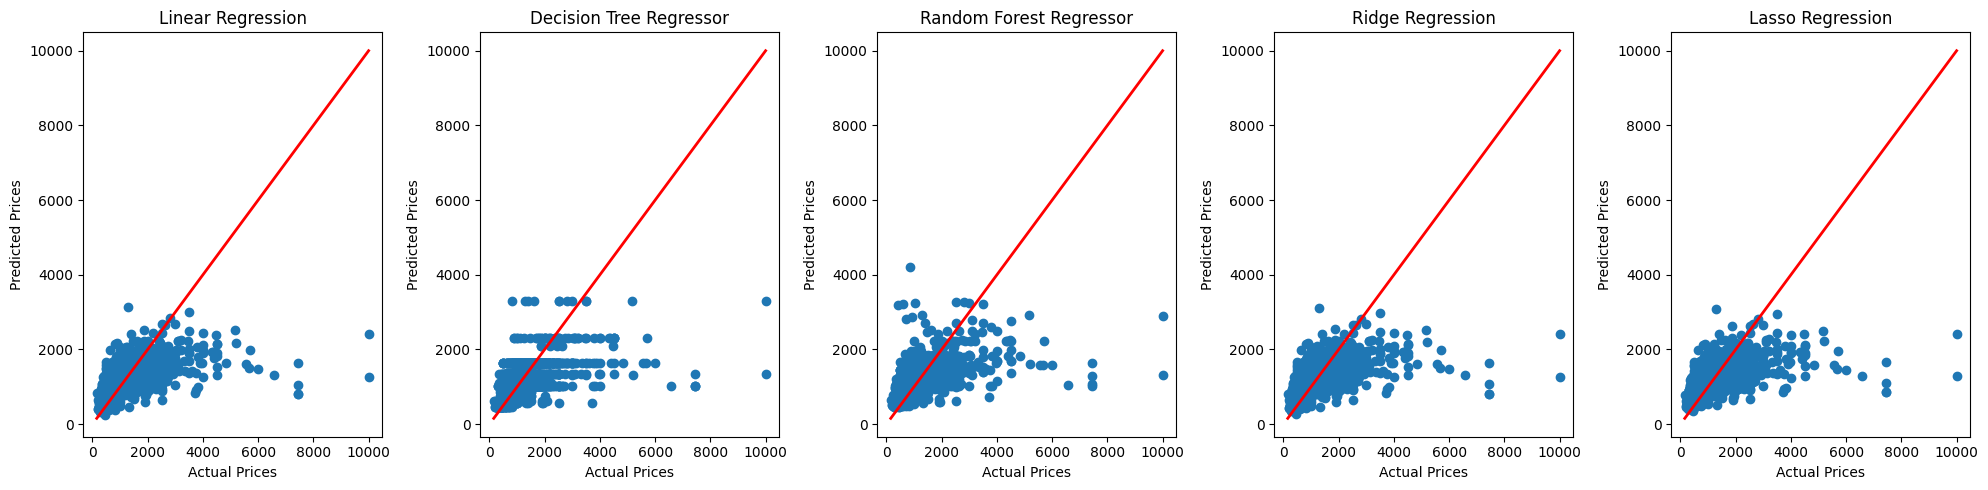

In [75]:
import matplotlib.pyplot as plt

# Predict test set values
y_pred_linear = linear_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)
y_pred_forest = forest_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Plot the actual vs predicted prices for each model
plt.figure(figsize=(20, 5))

# Linear Regression
plt.subplot(1, 5, 1)
plt.scatter(y_test, y_pred_linear, alpha=1)
plt.title('Linear Regression')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)

# Decision Tree
plt.subplot(1, 5, 2)
plt.scatter(y_test, y_pred_tree, alpha=1)
plt.title('Decision Tree Regressor')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)

# Random Forest
plt.subplot(1, 5, 3)
plt.scatter(y_test, y_pred_forest, alpha=1)
plt.title('Random Forest Regressor')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)

# Ridge Regression
plt.subplot(1, 5, 4)
plt.scatter(y_test, y_pred_ridge, alpha=1)
plt.title('Ridge Regression')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)

# Lasso Regression
plt.subplot(1, 5, 5)
plt.scatter(y_test, y_pred_lasso, alpha=1)
plt.title('Lasso Regression')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)


plt.tight_layout()
plt.show()


# Findings

1. **Model Performance**: 
   - The R² scores for all models show a relatively low performance, especially for Linear and Ridge Regression, indicating that they are not capturing the variability in the data well.
   - The Random Forest model, although slightly better, still doesn't achieve high R² scores, suggesting room for improvement.

2. **Impact of Room Types**:
   - The mix of different rental types (e.g., entire homes, private rooms, shared rooms) at varying price points complicates the modeling process. Each type may have distinct pricing patterns, leading to model misfit.
   - **Fix**: Train separate models for each `room_type` to capture the unique pricing dynamics better.


3. **Regularization**:
   - Both Ridge and Lasso regression performances are similar and only slightly lower than that of the Linear Regression model. This might indicate that regularization isn't significantly improving model performance given the current feature set.

5. **Decision Trees and Random Forests**:
   - Decision Tree and Random Forest models are providing slightly better scores, but they also suffer from overfitting given the complex nature of the dataset.
   - Tuning the hyperparameters (`max_depth` and `min_samples_split`) have enhance performance.

